# 1D SEI Model Post-processing

This notebook allows you to construct plots from your output data.

## Identify the data location
Start by naming the file(s) you want to process. 
This is the name of the folder inside the 'output' folder where the results are saved.

In [1]:
datafolder = 'DOE_12092020_baseline'
datafolder2 = 'DOE_12092020_thirdcond'
datafolder3 = 'DOE_12092020_tenthcond'

eps_min = 0.025
fs = 12

previous = 0

## Now we'll load the data:

In [2]:
%matplotlib notebook  

import os, csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# If you've run this block before, re-set chdir back to its original value, first:
if previous:
    os.chdir(cwd)
    
# Get the current working directory:
cwd = os.getcwd()
previous = 1
os.chdir(cwd+'/output/'+datafolder)

data = pd.read_csv('solution.csv',header=0)

# Get variable names:
f = open('names.csv','r')
names = csv.reader(f)
data_names = data.index.tolist()

i=0
for row in names:
    data_names[i]=(str('\t'.join(row)))
    i+=1

f.close()

data.index = data_names

from sei_1d_init import N_y, dy, nvars_node
#elif homogeneous:
#    from sei_1d_init import dy, nvars_node
# Transpose the data so that each row is for a time, and each column represents a variable:
data = data.T
data

##########################################################################################

os.chdir(cwd)

cwd = os.getcwd()
previous = 1
os.chdir(cwd+'/output/'+datafolder2)

data2 = pd.read_csv('solution.csv',header=0)

# Get variable names:
f2 = open('names.csv','r')
names2 = csv.reader(f2)
data_names2 = data2.index.tolist()

i=0
for row in names2:
    data_names2[i]=(str('\t'.join(row)))
    i+=1

f2.close()

data2.index = data_names2

from sei_1d_init import N_y, dy, nvars_node
#elif homogeneous:
#    from sei_1d_init import dy, nvars_node
# Transpose the data so that each row is for a time, and each column represents a variable:
data2 = data2.T

##########################################################################################

os.chdir(cwd)

cwd = os.getcwd()
previous = 1
os.chdir(cwd+'/output/'+datafolder3)

data3 = pd.read_csv('solution.csv',header=0)

# Get variable names:
f3 = open('names.csv','r')
names3 = csv.reader(f3)
data_names3 = data3.index.tolist()

i=0
for row in names3:
    data_names3[i]=(str('\t'.join(row)))
    i+=1

f3.close()

data3.index = data_names3

from sei_1d_init import N_y, dy, nvars_node
#elif homogeneous:
#    from sei_1d_init import dy, nvars_node
# Transpose the data so that each row is for a time, and each column represents a variable:
data3 = data3.T



     Cantera phases created. 

The species in the electrolyte are:
bulk[C3H4O3]
bulk[C4H8O3]
LipElyt
PF6mElyt
C2H6O2(el)
H2O(el)
C2H4
CO
CO2


The species in the SEI are:
LEDC[SEI]
Li2CO3[SEI]
Li2O[SEI]


## Plot SEI thickness vs. time.

We start by finding the volumes at each time where $\varepsilon_{\rm SEI}$ is greater than a user-defined minimum. The SEI thickness is equal to the summed thickness of all but the final volume $\left(n-1\right)\Delta y$, plus a fractional thickness $\varepsilon_{\rm SEI}(t)\Delta y$ of the final such volume at time $t$:

<IPython.core.display.Javascript object>


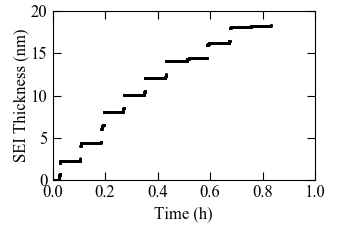

In [5]:
def thickness_calc(eps_min, data):
    thickness = []
    eps_SEI = data['eps SEI']

    for j,eps in eps_SEI.iterrows():
        grown = []
        growth = eps[eps['eps SEI']>eps_min]
        if growth.empty:
            thickness.append(0.)
        else:
            #print(growth.iloc[-1])
            thickness.append((growth.count()-1.+growth.iloc[-1])*dy)
    return thickness   
    

t = np.asarray(data.index[:],dtype=float)
y = np.asarray(thickness_calc(eps_min,data))
t2 = np.asarray(data2.index[:],dtype=float)
y2 = np.asarray(thickness_calc(eps_min,data2))
t3 = np.asarray(data3.index[:],dtype=float)
y3 = np.asarray(thickness_calc(eps_min,data3))

fig = plt.figure()
ax = fig.add_axes([0.15,0.2,0.75,0.75])
fig.set_size_inches((3.5,2.25))

plt.plot(t/3600,y*1e9,'k.',markersize=1.50)
#plt.plot(t2/3600,y2*1e9,'b.',markersize=1.50)
#plt.plot(t3/3600,y3*1e9,'g.',markersize=1.50)
plt.xlim([0,1.0])
plt.ylim([0,20])
plt.xlabel('Time (s)')
plt.ylabel('SEI thickness (nm)')
#plt.xticks(np.array([0.,1000.,2000.,3000.,4000.]))


font = plt.matplotlib.font_manager.FontProperties(family='Times New Roman',size=fs)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fs)
    tick.label1.set_fontname('Times New Roman')

ax.tick_params(axis="y",direction="in",length=5.5,right=True)
ax.tick_params(axis="x",direction="in",length=5.5,top=True)
ax.set_ylabel('SEI Thickness (nm)',fontsize=fs,family='Times New Roman',labelpad = 1.)
ax.set_xlabel('Time (h)',fontsize=fs,family='Times New Roman')
plt.savefig('Thickness_vs_time.pdf',format='pdf',dpi=350)

In [5]:
# Set cwd back to original value
os.chdir(cwd)

In [9]:
    from sei_1d_init import objs, params, voltage_lookup, SVptr
    
    sei = objs['SEI']
    
    profiles = data[-1,SVptr['Ck sei']]
    eps_k_sei = np.zeros_like(profiles)
    for i, p in enumerate(profiles):
        eps_sei = data[-1,SVptr['eps sei'][i]]
        vol_k = p*sei.partial_molar_volumes
        v_tot = np.dot(p,sei.partial_molar_volumes)
        eps_k_sei[i,:] = eps_sei*vol_k/v_tot
    names = list()
    
    for i in range(sei.n_species):
        names.append(sei.species_names[i])
    names.append('eps elyte')
    fig5, ax5 = plt.subplots(1, 1, figsize=(8, 7.2))
    ax5.plot(1e9*np.arange(params['Ny'])/params['dyInv'],eps_k_sei)
    ax5.plot(1e9*np.arange(params['Ny'])/params['dyInv'],1.-SV[-1,SVptr['eps sei']])
    ax5.legend(names)
    ax5.set_ylabel('Species volume fraction')
    ax5.set_xlabel('SEI Depth (from anode, nm)')

TypeError: unhashable type: 'numpy.ndarray'

In [7]:
print(data[])

['phi SEI', 'phi elyte', 'eps SEI', 'LEDC[SEI]', 'Li2CO3[SEI]', 'Li2O[SEI]', 'bulk[C3H4O3]', 'bulk[C4H8O3]', 'LipElyt', 'PF6mElyt', 'C2H6O2(el)', 'H2O(el)', 'C2H4', 'CO', 'CO2', 'phi SEI', 'phi elyte', 'eps SEI', 'LEDC[SEI]', 'Li2CO3[SEI]', 'Li2O[SEI]', 'bulk[C3H4O3]', 'bulk[C4H8O3]', 'LipElyt', 'PF6mElyt', 'C2H6O2(el)', 'H2O(el)', 'C2H4', 'CO', 'CO2', 'phi SEI', 'phi elyte', 'eps SEI', 'LEDC[SEI]', 'Li2CO3[SEI]', 'Li2O[SEI]', 'bulk[C3H4O3]', 'bulk[C4H8O3]', 'LipElyt', 'PF6mElyt', 'C2H6O2(el)', 'H2O(el)', 'C2H4', 'CO', 'CO2', 'phi SEI', 'phi elyte', 'eps SEI', 'LEDC[SEI]', 'Li2CO3[SEI]', 'Li2O[SEI]', 'bulk[C3H4O3]', 'bulk[C4H8O3]', 'LipElyt', 'PF6mElyt', 'C2H6O2(el)', 'H2O(el)', 'C2H4', 'CO', 'CO2', 'phi SEI', 'phi elyte', 'eps SEI', 'LEDC[SEI]', 'Li2CO3[SEI]', 'Li2O[SEI]', 'bulk[C3H4O3]', 'bulk[C4H8O3]', 'LipElyt', 'PF6mElyt', 'C2H6O2(el)', 'H2O(el)', 'C2H4', 'CO', 'CO2', 'phi SEI', 'phi elyte', 'eps SEI', 'LEDC[SEI]', 'Li2CO3[SEI]', 'Li2O[SEI]', 'bulk[C3H4O3]', 'bulk[C4H8O3]', 'LipEl